In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
# using ggplot style
plt.style.use("ggplot")
# setting width and height of plot
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
plt.rcParams['figure.figsize']

[12.0, 8.0]

In [4]:
# Load the Data
advert = pd.read_csv('Advertising.csv')
advert.head()
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Removing the index column
advert.drop(['Unnamed: 0'], axis=1, inplace=True)

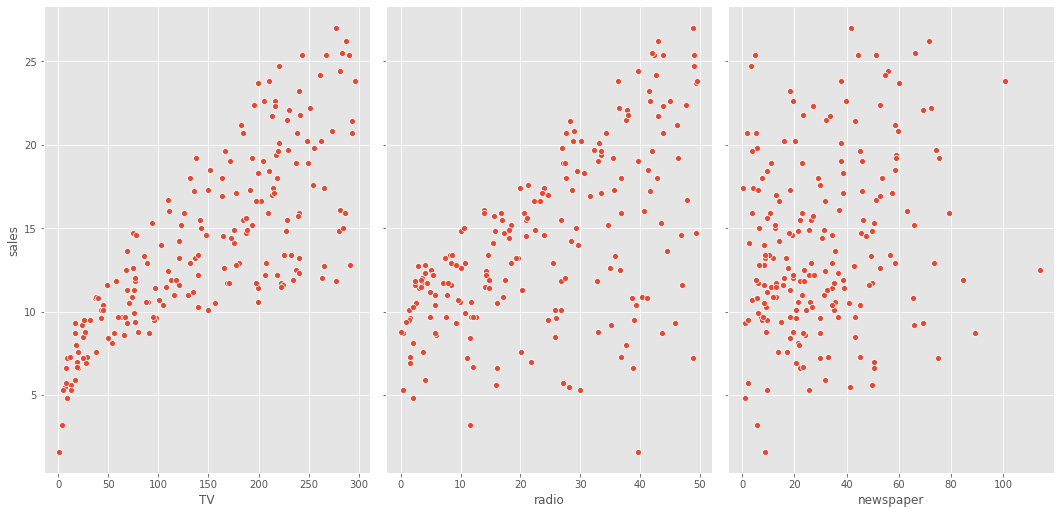

In [6]:
# Checking relationship between Features and Response
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'],
             y_vars='sales', height=7, aspect=0.7)

In [7]:
# Estimating Coefficients
from sklearn.linear_model import LinearRegression
X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

In [8]:
lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
# Displaying the coefficients with the features
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.04576464545539759),
 ('radio', 0.1885300169182046),
 ('newspaper', -0.0010374930424762452)]

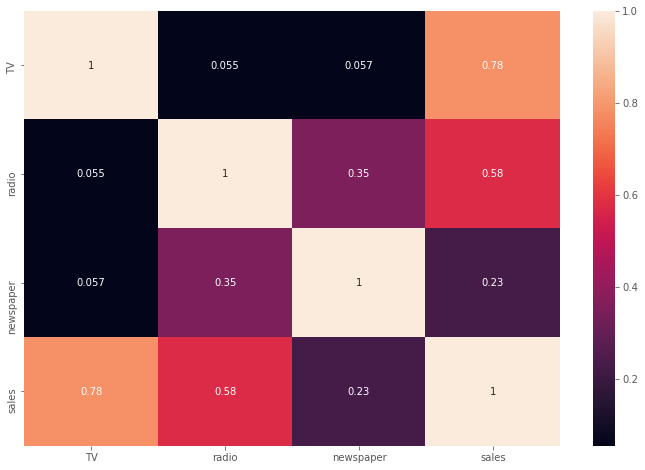

In [10]:
# Viewing the heatmap
sns.heatmap(advert.corr(), annot=True)

In [11]:
# Feature Selection
from sklearn.metrics import r2_score

# We are training and evaluating on the entire dataset
# Checking R_squared between 'TV', 'radio'
lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828957


In [12]:
# Checking R_squared between 'TV', 'newspaper'
lm4 = LinearRegression().fit(X[['TV', 'newspaper']], y)
lm4_preds = lm4.predict(X[['TV', 'newspaper']])

print("R^2: ", r2_score(y, lm4_preds))

R^2:  0.6458354938293271


In [13]:
# Checking R_squared between 'TV', 'radio', 'newspaper'
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789521


In [14]:
# Model Evaluation using Train/Test and Metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Using all three features
X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.4046514230328953
R^2:  0.9156213613792232


In [15]:
# Using just TV and radio features
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.3879034699382886
R^2:  0.9176214942248908


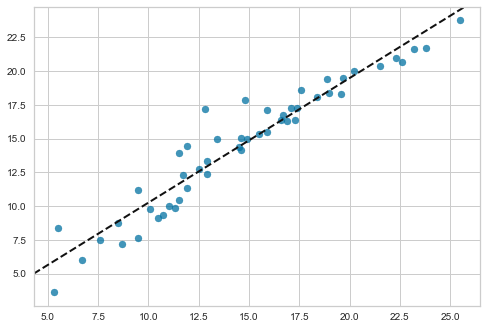

In [20]:
# Using yellowbrick to plot prediction error
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof;

In [21]:
# Interaction Effect (Synergy)
# creating new column radio*TV
advert['interaction'] = advert['TV'] * advert['radio']

# adding interaction term to our dataset
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm6 = LinearRegression().fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE:  0.7011871137164334
R^2:  0.978973681468126


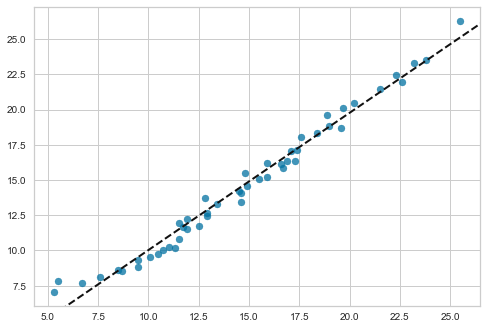

In [22]:
# Using yellowbrick to plot prediction error
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof;